In [ ]:
import pandas as pd
import re
import requests

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
df = pd.read_csv("/content/drive/MyDrive/CrawlShopee/datanewT9.csv")
df

,orderid,itemid,cmtid,rating,shopid,userid,author_shopid,author_username,name_product,model_product,comment,rating_star
0,130512743233902,19368582377,10923842087,1,619022569,924107842,924026393.0,dz0j4p7f3c,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Hồng,Một cỡ",Người đẹp vì lụa :))\nNch là áo đẹp nhưng hơi ...,5
1,131512583279711,19368582377,10981575306,1,619022569,196407014,196404054.0,banhquybietboi,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Quả mơ,Một cỡ","Áo khá đẹp, tui m68 55kg mặc kiểu fit ý chứ ko...",5
2,135194696261487,19368582377,11331226939,1,619022569,691714262,691694677.0,ngannbede,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Quả mơ,Một cỡ",Đúng với mô tả:chacws z\nMàu sắc:hoiw ngà\nChấ...,5
3,145732557281395,19368582377,12448328811,0,619022569,819825987,819839778.0,roncy7,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Quả mơ,Một cỡ","áo không giống mẫu, mỏng nhìn xiyeen thấu, phả...",3
4,134326722200490,19368582377,11255766627,1,619022569,104376388,104374908.0,t*****4,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Quả mơ,Một cỡ","Áo vải mịn mịn sờ thích cực, vải mềm, nên mua ...",5
...,...,...,...,...,...,...,...,...,...,...,...,...
25920,150570620279851,22643304874,12931221534,-1,985059108,507623272,507603693.0,5*****0,Chic váy nữ Đầm Body Cho thời váy trang hàng c...,"Màu vàng,XL","Màu sắc:vàng\n\nHàng không chất lượng , váy rấ...",1
25921,139366146252345,22643304874,11721882437,0,985059108,389521462,389501885.0,anhhfdjn,Chic váy nữ Đầm Body Cho thời váy trang hàng c...,"Màu vàng,S",Chất liệu:vải voan\nĐúng với mô tả:màu khác\nM...,3
25922,145682693252144,22643304874,12399413776,0,985059108,783939311,783955558.0,8j_62v11v7,Chic váy nữ Đầm Body Cho thời váy trang hàng c...,"Màu vàng,L",Chất liệu:dep\nĐúng với mô tả:dung\nMàu sắc:ko...,2
25923,143030115240111,22643304874,12076175410,1,985059108,2333602,2332323.0,beebeauty.20.20,Chic váy nữ Đầm Body Cho thời váy trang hàng c...,"Màu vàng,L",Giống mẫu nhưng chất thì hơi mỏng nhé các ty,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28555 entries, 0 to 28554
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   orderid          28555 non-null  int64  
 1   itemid           28555 non-null  int64  
 2   cmtid            28555 non-null  int64  
 3   rating           28555 non-null  int64  
 4   shopid           28555 non-null  int64  
 5   userid           28555 non-null  int64  
 6   author_shopid    28555 non-null  float64
 7   author_username  28555 non-null  object 
 8   name_product     28555 non-null  object 
 9   model_product    23957 non-null  object 
 10  comment          28555 non-null  object 
 11  rating_star      28555 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 2.6+ MB


In [22]:
import pandas as pd
import re
import requests


def crawl_data():
    url = input('Nhập url trang:')
    print("Loading url=", url)
    r = re.search(r"i\.(\d+)\.(\d+)", url)
    shop_id, item_id = r[1], r[2]
    ratings_url = "https://shopee.vn/api/v2/item/get_ratings?filter=0&flag=1&itemid={item_id}&limit=20&offset={offset}&shopid={shop_id}&type=0"

    offset = 0
    crawlData = []
    product_items = []

    while True:
        data = requests.get(
            ratings_url.format(shop_id=shop_id, item_id=item_id, offset=offset)
        ).json()
        i = 1
        for i, rating in enumerate(data["data"]["ratings"], 1):
            crawlData.append(rating)
            product_items.append(rating['product_items'])
        if i % 20:
            break

        offset += 20

    name_product = []
    model_product = []
    for sublist in product_items:
        for item in sublist:
            name_product.append(item['name'])
            model_product.append(item['model_name'])

    crawlData = pd.DataFrame(crawlData)
    crawlData['name_product'] = name_product[0:len(crawlData)]
    crawlData['model_product'] = model_product[0:len(crawlData)]
    crawlData = crawlData.loc[:, ['orderid', 'itemid', 'cmtid', 'rating','shopid', 'userid', 'author_shopid','author_username'
                                  ,'name_product', 'model_product', 'comment', 'rating_star']]

    crawlData = crawlData[crawlData['comment'] != ""]
    crawlData = crawlData.dropna()
    crawlData = crawlData.reset_index(drop=True)

    return crawlData

In [23]:
crawlData = crawl_data()
crawlData

Nhập url trang:https://shopee.vn/%C3%81o-babytee-h%C3%ACnh-tr%C3%A1i-tim-%E1%BA%A3nh-th%E1%BA%ADt-3-m%C3%A0u-i.129564134.21279648256?sp_atk=2180df4e-1629-45cb-b40c-a829332f533a&xptdk=2180df4e-1629-45cb-b40c-a829332f533a
Loading url= https://shopee.vn/%C3%81o-babytee-h%C3%ACnh-tr%C3%A1i-tim-%E1%BA%A3nh-th%E1%BA%ADt-3-m%C3%A0u-i.129564134.21279648256?sp_atk=2180df4e-1629-45cb-b40c-a829332f533a&xptdk=2180df4e-1629-45cb-b40c-a829332f533a


,orderid,itemid,cmtid,rating,shopid,userid,author_shopid,author_username,name_product,model_product,comment,rating_star
0,145127744247094,21279648256,12526928238,1,129564134,327096935,327077360,hathemmilo,Áo babytee hình trái tim - ảnh thật 3 màu,"Xám tiêu,Freesize",Màu sắc:ổn\nĐúng với mô tả:đúng\nChất liệu:tốt...,5
1,142364506226063,21279648256,11931402433,1,129564134,173576411,173573959,thaovynguyen1162,Áo babytee hình trái tim - ảnh thật 3 màu,"Trắng,Freesize","Áo dễ thương lắm nha, giá rẻ mà k có chê đc ch...",5
2,140872311231132,21279648256,11886767554,1,129564134,858752775,858739334,t*****e,Áo babytee hình trái tim - ảnh thật 3 màu,"Xám tiêu,Freesize",Màu sắc:xám tiêu\nChất liệu:vải tăm\nĐúng với ...,5
3,139765425202696,21279648256,11699094564,1,129564134,73067577,73066114,h*****.,Áo babytee hình trái tim - ảnh thật 3 màu,"Trắng,Freesize",Đúng với mô tả:đúng\nChất liệu:cotton\nMàu sắc...,5
4,144749391246552,21279648256,12209400491,1,129564134,159909502,159907451,f_uck_bitch,Áo babytee hình trái tim - ảnh thật 3 màu,"Xám tiêu,Freesize",Đúng với mô tả:90%\nMàu sắc:nhu hinh\nChất liệ...,5
5,140175590257889,21279648256,11740598669,1,129564134,745083189,745063604,8*****i,Áo babytee hình trái tim - ảnh thật 3 màu,"Xám tiêu,Freesize",Chất vải sờ ổn không biết giặt xong như nào. N...,5
6,142329121217101,21279648256,11977826191,1,129564134,143755978,143754154,nguyethc12,Áo babytee hình trái tim - ảnh thật 3 màu,"Xám tiêu,Freesize",Màu sắc:xâm\nChất liệu:thun\nĐúng với mô tả:đú...,5
7,144570747272981,21279648256,12442469713,1,129564134,281421805,281415133,m*****3,Áo babytee hình trái tim - ảnh thật 3 màu,"Xám tiêu,Freesize","Màu sắc:xám trắng, trắng nhiều hơn\nĐúng với m...",5
8,143945780293678,21279648256,12089603338,1,129564134,22829357,22828021,h*****1,Áo babytee hình trái tim - ảnh thật 3 màu,"Xám tiêu,Freesize",Chất liệu:vải mát\nMàu sắc:màu xám tiêu\nĐúng ...,5
9,138707405260941,21279648256,11611900095,1,129564134,680995914,680976329,iamtthuong,Áo babytee hình trái tim - ảnh thật 3 màu,"Trắng,Freesize","Màu sắc:trắng\n\nÁo xinh, vải đẹp, không có gì...",5


from matplotlib import pyplot as plt
crawlData['orderid'].plot(kind='hist', bins=20, title='orderid')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
crawlData['cmtid'].plot(kind='hist', bins=20, title='cmtid')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
crawlData['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
crawlData['userid'].plot(kind='hist', bins=20, title='userid')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
crawlData.groupby('model_product').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
crawlData.plot(kind='scatter', x='orderid', y='cmtid', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
crawlData.plot(kind='scatter', x='cmtid', y='rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
crawlData.plot(kind='scatter', x='rating', y='userid', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
crawlData.plot(kind='scatter', x='userid', y='author_shopid', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['itemid']
  ys = series['orderid']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = crawlData.sort_values('itemid', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('model_product')):
  _plot_series(series, series_name, i)
  fig.legend(title='model_product', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('itemid')
_ = plt.ylabel('orderid')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['itemid']
  ys = series['cmtid']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = crawlData.sort_values('itemid', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('model_product')):
  _plot_series(series, series_name, i)
  fig.legend(title='model_product', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('itemid')
_ = plt.ylabel('cmtid')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['itemid']
  ys = series['rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = crawlData.sort_values('itemid', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('model_product')):
  _plot_series(series, series_name, i)
  fig.legend(title='model_product', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('itemid')
_ = plt.ylabel('rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['itemid']
  ys = series['userid']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = crawlData.sort_values('itemid', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('model_product')):
  _plot_series(series, series_name, i)
  fig.legend(title='model_product', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('itemid')
_ = plt.ylabel('userid')

from matplotlib import pyplot as plt
crawlData['orderid'].plot(kind='line', figsize=(8, 4), title='orderid')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
crawlData['cmtid'].plot(kind='line', figsize=(8, 4), title='cmtid')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
crawlData['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
crawlData['userid'].plot(kind='line', figsize=(8, 4), title='userid')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(crawlData['model_product'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(crawlData, x='orderid', y='model_product', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(crawlData['model_product'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(crawlData, x='cmtid', y='model_product', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(crawlData['model_product'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(crawlData, x='rating', y='model_product', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(crawlData['model_product'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(crawlData, x='userid', y='model_product', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['orderid'].plot(kind='hist', bins=20, title='orderid')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['cmtid'].plot(kind='hist', bins=20, title='cmtid')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('model_product').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='orderid', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='orderid', y='cmtid', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='cmtid', y='rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='rating', y='userid', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['orderid']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('model_product')):
  _plot_series(series, series_name, i)
  fig.legend(title='model_product', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('orderid')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['cmtid']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('model_product')):
  _plot_series(series, series_name, i)
  fig.legend(title='model_product', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('cmtid')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('model_product')):
  _plot_series(series, series_name, i)
  fig.legend(title='model_product', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['userid']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('model_product')):
  _plot_series(series, series_name, i)
  fig.legend(title='model_product', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('userid')

from matplotlib import pyplot as plt
_df_13['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['orderid'].plot(kind='line', figsize=(8, 4), title='orderid')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['cmtid'].plot(kind='line', figsize=(8, 4), title='cmtid')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['model_product'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='model_product', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['model_product'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='orderid', y='model_product', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['model_product'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='cmtid', y='model_product', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['model_product'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='rating', y='model_product', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CrawlShopee/datanewT9.csv")

df1 = crawl_data()
df_concat = pd.concat([df, df1], ignore_index=True)
df_concat.to_csv("/content/drive/MyDrive/CrawlShopee/datanewT9.csv", index=False)
df_concat


Nhập url trang:https://shopee.vn/Chic-v%C3%A1y-n%E1%BB%AF-%C4%90%E1%BA%A7m-Body-Cho-th%E1%BB%9Di-v%C3%A1y-trang-h%C3%A0ng-cao-c%E1%BA%A5p-t%C3%ADnh-c%C3%A1ch-m%E1%BB%81m-m%E1%BB%8Bn-2023NEW-MAY2407-i.985059108.22643304874?sp_atk=2161d9f4-5ba7-4f6c-8b47-19ee0cccf889&xptdk=2161d9f4-5ba7-4f6c-8b47-19ee0cccf889
Loading url= https://shopee.vn/Chic-v%C3%A1y-n%E1%BB%AF-%C4%90%E1%BA%A7m-Body-Cho-th%E1%BB%9Di-v%C3%A1y-trang-h%C3%A0ng-cao-c%E1%BA%A5p-t%C3%ADnh-c%C3%A1ch-m%E1%BB%81m-m%E1%BB%8Bn-2023NEW-MAY2407-i.985059108.22643304874?sp_atk=2161d9f4-5ba7-4f6c-8b47-19ee0cccf889&xptdk=2161d9f4-5ba7-4f6c-8b47-19ee0cccf889


,orderid,itemid,cmtid,rating,shopid,userid,author_shopid,author_username,name_product,model_product,comment,rating_star
0,130512743233902,19368582377,10923842087,1,619022569,924107842,924026393.0,dz0j4p7f3c,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Hồng,Một cỡ",Người đẹp vì lụa :))\nNch là áo đẹp nhưng hơi ...,5
1,131512583279711,19368582377,10981575306,1,619022569,196407014,196404054.0,banhquybietboi,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Quả mơ,Một cỡ","Áo khá đẹp, tui m68 55kg mặc kiểu fit ý chứ ko...",5
2,141220209207001,19368582377,12031835238,1,619022569,198485355,198482314.0,l*****e,[Mã BTS23 giảm đến 30k đơn 150k] Áo sơ mi XINL...,"Quả mơ,Một cỡ",Đúng với mô tả:yes\nMàu sắc:trắng kem\nChất li...,5
3,144607328289445,19368582377,12436172619,1,619022569,216047295,216043459.0,h*****1,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Quả mơ,Một cỡ",Áo xinh lắm lun nha săn sale giá rẻ mà đc á nm...,5
4,135194696261487,19368582377,11331226939,1,619022569,691714262,691694677.0,ngannbede,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Quả mơ,Một cỡ",Đúng với mô tả:chacws z\nMàu sắc:hoiw ngà\nChấ...,5
...,...,...,...,...,...,...,...,...,...,...,...,...
30920,139366146252345,22643304874,11721882437,0,985059108,389521462,389501885.0,anhhfdjn,Chic váy nữ Đầm Body Cho thời váy trang hàng c...,"Màu vàng,S",Chất liệu:vải voan\nĐúng với mô tả:màu khác\nM...,3
30921,145682693252144,22643304874,12399413776,0,985059108,783939311,783955558.0,8j_62v11v7,Chic váy nữ Đầm Body Cho thời váy trang hàng c...,"Màu vàng,L",Chất liệu:dep\nĐúng với mô tả:dung\nMàu sắc:ko...,2
30922,143030115240111,22643304874,12076175410,1,985059108,2333602,2332323.0,beebeauty.20.20,Chic váy nữ Đầm Body Cho thời váy trang hàng c...,"Màu vàng,L",Giống mẫu nhưng chất thì hơi mỏng nhé các ty,4
30923,139628842216377,22643304874,11707451082,-1,985059108,682280500,682260915.0,_s8l6g_jxg,Chic váy nữ Đầm Body Cho thời váy trang hàng c...,"Màu vàng,L",Quá tệ hong nên mua nha mn,1


In [ ]:
df = df_concat.drop_duplicates()
df

,orderid,itemid,cmtid,rating,shopid,userid,author_shopid,author_username,name_product,model_product,comment,rating_star
0,130512743233902,19368582377,10923842087,1,619022569,924107842,924026393.0,dz0j4p7f3c,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Hồng,Một cỡ",Người đẹp vì lụa :))\nNch là áo đẹp nhưng hơi ...,5
1,131512583279711,19368582377,10981575306,1,619022569,196407014,196404054.0,banhquybietboi,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Quả mơ,Một cỡ","Áo khá đẹp, tui m68 55kg mặc kiểu fit ý chứ ko...",5
2,141220209207001,19368582377,12031835238,1,619022569,198485355,198482314.0,l*****e,[Mã BTS23 giảm đến 30k đơn 150k] Áo sơ mi XINL...,"Quả mơ,Một cỡ",Đúng với mô tả:yes\nMàu sắc:trắng kem\nChất li...,5
3,144607328289445,19368582377,12436172619,1,619022569,216047295,216043459.0,h*****1,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Quả mơ,Một cỡ",Áo xinh lắm lun nha săn sale giá rẻ mà đc á nm...,5
4,135194696261487,19368582377,11331226939,1,619022569,691714262,691694677.0,ngannbede,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Quả mơ,Một cỡ",Đúng với mô tả:chacws z\nMàu sắc:hoiw ngà\nChấ...,5
...,...,...,...,...,...,...,...,...,...,...,...,...
30920,139366146252345,22643304874,11721882437,0,985059108,389521462,389501885.0,anhhfdjn,Chic váy nữ Đầm Body Cho thời váy trang hàng c...,"Màu vàng,S",Chất liệu:vải voan\nĐúng với mô tả:màu khác\nM...,3
30921,145682693252144,22643304874,12399413776,0,985059108,783939311,783955558.0,8j_62v11v7,Chic váy nữ Đầm Body Cho thời váy trang hàng c...,"Màu vàng,L",Chất liệu:dep\nĐúng với mô tả:dung\nMàu sắc:ko...,2
30922,143030115240111,22643304874,12076175410,1,985059108,2333602,2332323.0,beebeauty.20.20,Chic váy nữ Đầm Body Cho thời váy trang hàng c...,"Màu vàng,L",Giống mẫu nhưng chất thì hơi mỏng nhé các ty,4
30923,139628842216377,22643304874,11707451082,-1,985059108,682280500,682260915.0,_s8l6g_jxg,Chic váy nữ Đầm Body Cho thời váy trang hàng c...,"Màu vàng,L",Quá tệ hong nên mua nha mn,1


In [ ]:
# random_sample = df_concat[df_concat["rating_star"] == 5].sample(n=1000)
# df_concat = df_concat.drop(random_sample['orderid'].index)
# df_concat = df_concat.reset_index(drop=True)
df_concat.to_csv("/content/drive/MyDrive/CrawlShopee/datanewT9.csv", index=False)
df_concat

,orderid,itemid,cmtid,rating,shopid,userid,author_shopid,author_username,name_product,model_product,comment,rating_star
0,130512743233902,19368582377,10923842087,1,619022569,924107842,924026393.0,dz0j4p7f3c,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Hồng,Một cỡ",Người đẹp vì lụa :))\nNch là áo đẹp nhưng hơi ...,5
1,131512583279711,19368582377,10981575306,1,619022569,196407014,196404054.0,banhquybietboi,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Quả mơ,Một cỡ","Áo khá đẹp, tui m68 55kg mặc kiểu fit ý chứ ko...",5
2,135194696261487,19368582377,11331226939,1,619022569,691714262,691694677.0,ngannbede,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Quả mơ,Một cỡ",Đúng với mô tả:chacws z\nMàu sắc:hoiw ngà\nChấ...,5
3,145732557281395,19368582377,12448328811,0,619022569,819825987,819839778.0,roncy7,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Quả mơ,Một cỡ","áo không giống mẫu, mỏng nhìn xiyeen thấu, phả...",3
4,134326722200490,19368582377,11255766627,1,619022569,104376388,104374908.0,t*****4,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Quả mơ,Một cỡ","Áo vải mịn mịn sờ thích cực, vải mềm, nên mua ...",5
...,...,...,...,...,...,...,...,...,...,...,...,...
25920,150570620279851,22643304874,12931221534,-1,985059108,507623272,507603693.0,5*****0,Chic váy nữ Đầm Body Cho thời váy trang hàng c...,"Màu vàng,XL","Màu sắc:vàng\n\nHàng không chất lượng , váy rấ...",1
25921,139366146252345,22643304874,11721882437,0,985059108,389521462,389501885.0,anhhfdjn,Chic váy nữ Đầm Body Cho thời váy trang hàng c...,"Màu vàng,S",Chất liệu:vải voan\nĐúng với mô tả:màu khác\nM...,3
25922,145682693252144,22643304874,12399413776,0,985059108,783939311,783955558.0,8j_62v11v7,Chic váy nữ Đầm Body Cho thời váy trang hàng c...,"Màu vàng,L",Chất liệu:dep\nĐúng với mô tả:dung\nMàu sắc:ko...,2
25923,143030115240111,22643304874,12076175410,1,985059108,2333602,2332323.0,beebeauty.20.20,Chic váy nữ Đầm Body Cho thời váy trang hàng c...,"Màu vàng,L",Giống mẫu nhưng chất thì hơi mỏng nhé các ty,4


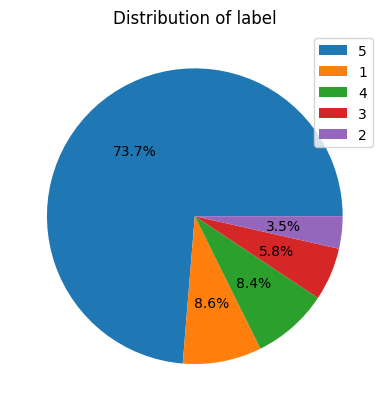

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
# import underthesea
# from unidecode import unidecode
dt = df_concat['rating_star'].value_counts()
labels = dt.index.tolist()

plt.pie(dt, autopct = '%0.1f%%')
plt.legend(labels)
plt.title('Distribution of label')
plt.show()

In [ ]:
df.to_csv("/content/drive/MyDrive/CrawlShopee/datanewT9.csv", index=False)
df

,orderid,itemid,cmtid,rating,shopid,userid,author_shopid,author_username,name_product,model_product,comment,rating_star
0,130512743233902,19368582377,10923842087,1,619022569,924107842,924026393.0,dz0j4p7f3c,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Hồng,Một cỡ",Người đẹp vì lụa :))\nNch là áo đẹp nhưng hơi ...,5
1,131512583279711,19368582377,10981575306,1,619022569,196407014,196404054.0,banhquybietboi,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Quả mơ,Một cỡ","Áo khá đẹp, tui m68 55kg mặc kiểu fit ý chứ ko...",5
2,141220209207001,19368582377,12031835238,1,619022569,198485355,198482314.0,l*****e,[Mã BTS23 giảm đến 30k đơn 150k] Áo sơ mi XINL...,"Quả mơ,Một cỡ",Đúng với mô tả:yes\nMàu sắc:trắng kem\nChất li...,5
3,144607328289445,19368582377,12436172619,1,619022569,216047295,216043459.0,h*****1,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Quả mơ,Một cỡ",Áo xinh lắm lun nha săn sale giá rẻ mà đc á nm...,5
4,135194696261487,19368582377,11331226939,1,619022569,691714262,691694677.0,ngannbede,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Quả mơ,Một cỡ",Đúng với mô tả:chacws z\nMàu sắc:hoiw ngà\nChấ...,5
...,...,...,...,...,...,...,...,...,...,...,...,...
8861,142378911230885,15330898914,11987309520,1,65589552,126765294,126763470.0,nndung388,[ELSS1725 Giảm 8%] Điện Thoại Samsung Galaxy S...,Xám,"Sản phẩm tốt, đúng như mặt hàng, đóng gói cẩn ...",5
8862,141663162235794,15330898914,11883429819,1,65589552,136961521,136959697.0,q*****r,[ELSS1725 Giảm 8%] Điện Thoại Samsung Galaxy S...,Tím,Tính năng nổi bật:khá mượt.\nChất lượng sản ph...,5
8863,141616977201977,15330898914,11883301196,1,65589552,284109224,284101911.0,dothedan11,[ELSS1725 Giảm 8%] Điện Thoại Samsung Galaxy S...,Xanh Lá,Giao nhanh\nĐúng sản phẩm\nDùng khác thích \nS...,5
8864,130275544239078,15330898914,10875071985,1,65589552,31872418,31871034.0,jinnguyen95,[Mã ELRE2TR giảm 10% đơn 5TR] Điện Thoại Samsu...,Xám,Chất lượng sản phẩm:tốt\n\nDùng 1 tuần rồi mới...,5
